In [ ]:
import pandas as pd

# Load the uploaded data to examine its structure
file_path = '/content/month_sunspot.csv'
sunspot_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
sunspot_data.head()


,Year,Month,Decimal date,Monthly total sunspot number,Standard deviation,Number of observations,Definitive/provisional indicator
0,1749,2,1749.123,104.3,-1.0,-1,1
1,1749,3,1749.204,116.7,-1.0,-1,1
2,1749,4,1749.288,92.8,-1.0,-1,1
3,1749,5,1749.371,141.7,-1.0,-1,1
4,1749,6,1749.455,139.2,-1.0,-1,1


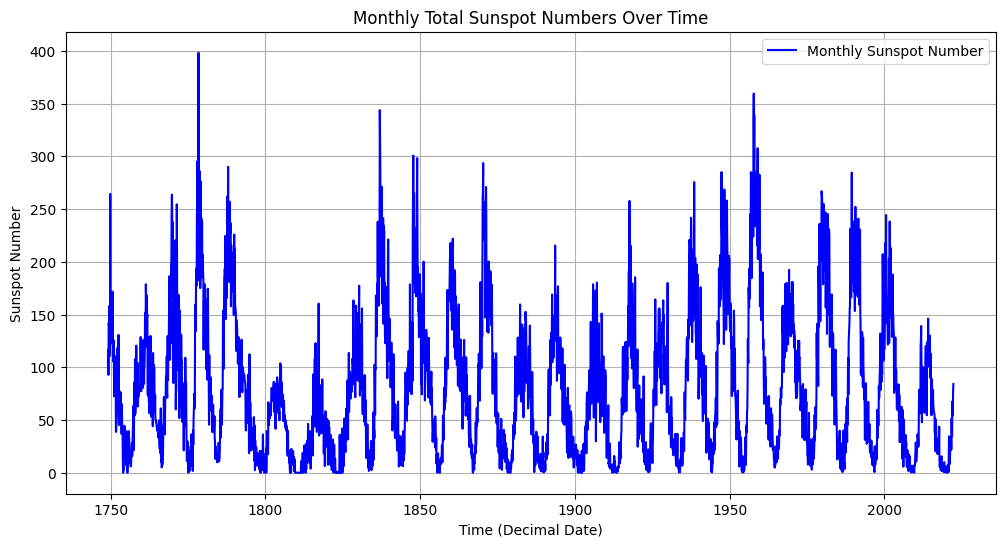

,0
Sunspot Number,0


In [ ]:
import matplotlib.pyplot as plt

# Extract relevant columns and set the time index
sunspot_data_cleaned = sunspot_data[["Decimal date", "Monthly total sunspot number"]].copy()
sunspot_data_cleaned.columns = ["Date", "Sunspot Number"]
sunspot_data_cleaned.set_index("Date", inplace=True)

# Check for missing values
missing_values = sunspot_data_cleaned.isnull().sum()

# Plot the data to observe its trend
plt.figure(figsize=(12, 6))
plt.plot(sunspot_data_cleaned, label="Monthly Sunspot Number", color='blue')
plt.title("Monthly Total Sunspot Numbers Over Time")
plt.xlabel("Time (Decimal Date)")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid()
plt.show()

missing_values


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fit an ARIMA model
# Using simple order (5,1,0) for demonstration; this can be optimized further.
model = ARIMA(sunspot_data_cleaned, order=(5, 1, 0))
model_fit = model.fit()

# Predict 1, 6, and 9 months into the future
forecast_horizon = [1, 6, 9]
forecast_steps = max(forecast_horizon)  # Predict up to the maximum horizon
forecast = model_fit.forecast(steps=forecast_steps)

# Instead of using positional indexing, access by position using .iloc[]:
predicted_values = forecast.iloc[[step - 1 for step in forecast_horizon]]
predicted_values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,predicted_mean
3279,74.366080
3284,74.721620
3287,74.260693


In [ ]:
# Correctly extract predictions for 1, 6, and 9 months into the future
forecast.index = range(1, len(forecast) + 1)  # Reset index to start from 1 for month steps
predicted_values = forecast.loc[forecast_horizon]
predicted_values


,predicted_mean
1,74.366080
6,74.721620
9,74.260693
